# Formulasi Masalah
---
Diberikan suatu dataset yaitu dataset salju yang dibagi menjadi dua bagian, yaitu data train dan data test. Berdasarkan dataset tersebut, permasalahan yang harus diselesaikan adalah bagaimana memprediksi apakah besok akan turun salju atau tidak. Untuk itu, dilakukan *task classsification* terhadap suatu variabel data yang dipilih. Klasifikasi bertujuan untuk melakukan pengelompokan terhadap suatu data, dimana data yang digunakan tersebut mempunyai kelas label atau target. Metode K-Nearest Neighbors (KNN), Decision Tree, Random Forest, Support Vector Machine (SVM), AdaBoost, dan Gradient Boosting merupakan algoritma yang digunakan untuk klasifikasi data. Kemudian, dilakukan evaluasi menggunakan Confusion Matrix untuk mengukur kinerja model dari kelima algoritma yang digunakan.





**Penggunaan Library**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np  
import pandas as pd 
pd.options.mode.chained_assignment = None
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from IPython.display import Image
from matplotlib import style
from scipy import stats
from six import StringIO
from sklearn import preprocessing,svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

%matplotlib inline
plt.style.use("ggplot")

# Eksplorasi Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Train

In [ ]:
#load data salju_train.csv
data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/salju_train.csv')
 
#menampilkan 5 data pertama
data_train.head(5)

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


In [ ]:
#menampilkan tuple dimensi array
data_train.shape

(109095, 24)

Data untuk train memiliki 109095 baris dan 24 kolom

In [ ]:
#menampilkan no index dan tipe data
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        109095 non-null  int64  
 1   Tanggal                   109095 non-null  object 
 2   KodeLokasi                109095 non-null  object 
 3   SuhuMin                   107973 non-null  float64
 4   SuhuMax                   108166 non-null  float64
 5   Hujan                     106664 non-null  float64
 6   Penguapan                 62071 non-null   float64
 7   SinarMatahari             56716 non-null   float64
 8   ArahAnginTerkencang       101351 non-null  object 
 9   KecepatanAnginTerkencang  101399 non-null  float64
 10  ArahAngin9am              101172 non-null  object 
 11  ArahAngin3pm              105898 non-null  object 
 12  KecepatanAngin9am         107742 non-null  float64
 13  KecepatanAngin3pm         106792 non-null  f

In [ ]:
#print kolom yang bertipe data numeric
data_train._get_numeric_data().columns

Index(['id', 'SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan', 'SinarMatahari',
       'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm',
       'Kelembaban9am', 'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am',
       'Awan3pm', 'Suhu9am', 'Suhu3pm'],
      dtype='object')

In [ ]:
#drop kolom bertipe data "object" kecuali kolom "BersaljuHariIni" dan "BersaljuBesok" karena termasuk kolom berlabel
data_train = data_train.drop(columns=['id', 'Tanggal', 'KodeLokasi', 'ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm'])

data_train.head(5)

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,10.4,15.5,4.8,NaN,NaN,24.0,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,9.0,17.0,8.0,2.6,7.4,NaN,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,18.2,32.0,0.0,NaN,NaN,44.0,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,7.3,24.5,0.0,8.4,10.4,54.0,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5.9,20.3,0.0,3.6,12.6,37.0,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


**Menampilkan korelasi antar variabel menggunakan heatmap**

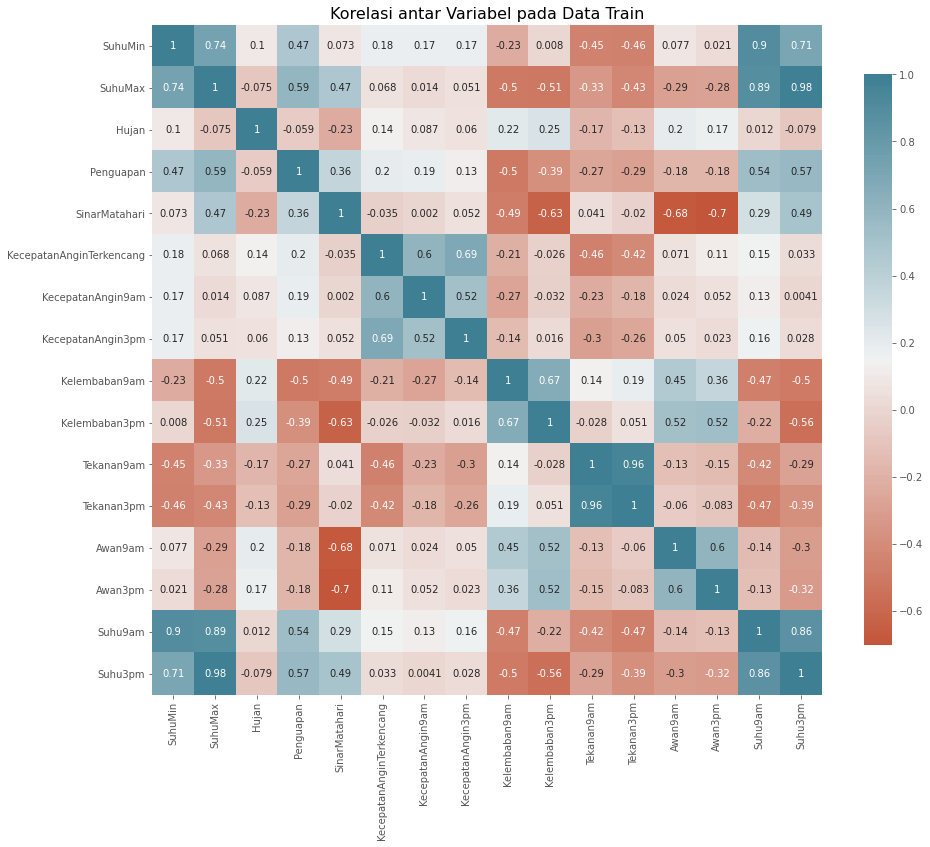

In [ ]:
#korelasi antar variabel numeric
corr = data_train.corr()
f, ax = plt.subplots(figsize=(15,15))
plt.title('Korelasi antar Variabel pada Data Train', y=1, size=16)
ax = sns.heatmap(corr,
                 square=True, 
                 #vmax=0.8,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 annot=True,
                 cbar_kws={'shrink': .7}
                 )

Berdasarkan heatmap di atas dapat dilihat bahwa fitur yang memiliki korelasi tertinggi adalah SuhuMax terhadap Suhu3pm yaitu 0,98 dan selanjutnya suhu9am terhadap SuhuMin 0,9.

In [ ]:
#Menampilkan tabel korelasi antar variabel
dftrain_corr = data_train.corr()
dftrain_corr

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
SuhuMin,1.000000,0.735500,0.104391,0.465508,0.072501,0.177627,0.174358,0.174122,-0.232101,0.007974,-0.449684,-0.459596,0.077349,0.021105,0.901208,0.707578
SuhuMax,0.735500,1.000000,-0.074669,0.585475,0.470991,0.068244,0.013632,0.050793,-0.504014,-0.507921,-0.331431,-0.426012,-0.291573,-0.279039,0.886984,0.984434
Hujan,0.104391,-0.074669,1.000000,-0.058940,-0.226845,0.135081,0.087157,0.059562,0.223661,0.254898,-0.168638,-0.127506,0.195540,0.170791,0.011781,-0.079160
Penguapan,0.465508,0.585475,-0.058940,1.000000,0.364745,0.198965,0.188950,0.128217,-0.499698,-0.387161,-0.268648,-0.291740,-0.181615,-0.181563,0.542808,0.570758
SinarMatahari,0.072501,0.470991,-0.226845,0.364745,1.000000,-0.035040,0.002004,0.051812,-0.489242,-0.627920,0.041321,-0.020052,-0.676965,-0.703482,0.291601,0.490993
KecepatanAnginTerkencang,0.177627,0.068244,0.135081,0.198965,-0.035040,1.000000,0.604677,0.686629,-0.214062,-0.026049,-0.460665,-0.415953,0.071323,0.105835,0.150043,0.033001
KecepatanAngin9am,0.174358,0.013632,0.087157,0.188950,0.002004,0.604677,1.000000,0.518093,-0.272566,-0.032366,-0.229197,-0.176461,0.024425,0.051593,0.127675,0.004132
KecepatanAngin3pm,0.174122,0.050793,0.059562,0.128217,0.051812,0.686629,0.518093,1.000000,-0.144640,0.016263,-0.298189,-0.257869,0.050446,0.023239,0.162047,0.027859
Kelembaban9am,-0.232101,-0.504014,0.223661,-0.499698,-0.489242,-0.214062,-0.272566,-0.144640,1.000000,0.667101,0.138628,0.185534,0.452897,0.356101,-0.471206,-0.498840
Kelembaban3pm,0.007974,-0.507921,0.254898,-0.387161,-0.627920,-0.026049,-0.032366,0.016263,0.667101,1.000000,-0.028295,0.050983,0.517553,0.523358,-0.219775,-0.557240


**Menampilkan outlier pada setiap variabel**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


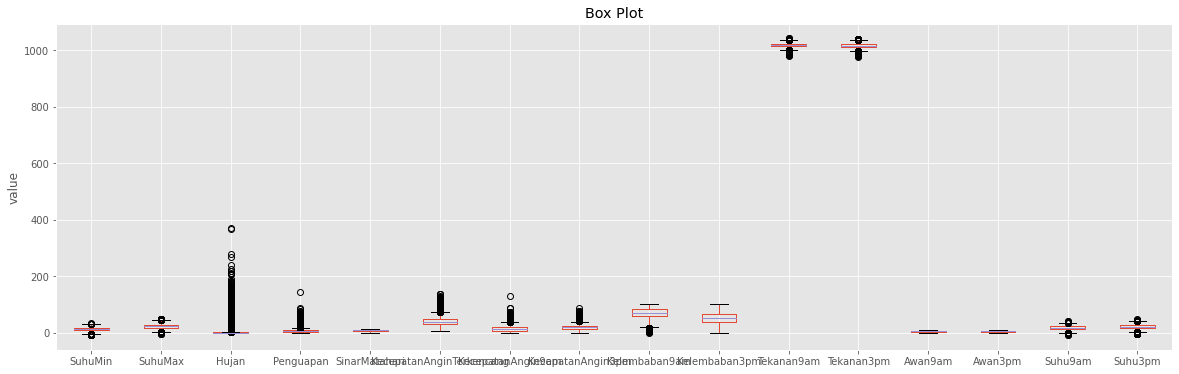

In [ ]:
data_train.plot(kind="box",
              figsize=(20, 6))

plt.title('Box Plot')
plt.ylabel('value')

plt.show()

Berdasarkan box plot di atas, fitur hujan merupakan fitur yang paling banyak memiliki outlier.

## Data Test

In [ ]:
#load data salju_test.csv
data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/salju_test.csv')

#menampilkan 5 data pertama
data_test.head(5)

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,W,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,NW,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,N,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,SSE,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,WNW,13.0,9.0,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No


In [ ]:
#mengganti No menjadi Tidak dan Yes menjadi Ya
data_test = data_test.replace({'No': 'Tidak', 'Yes': 'Ya'})

In [ ]:
#menampilkan tuple dimensi array
data_test.shape

(18182, 23)

In [ ]:
#menampilkan no index dan tipe data
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tanggal                   18182 non-null  object 
 1   KodeLokasi                18182 non-null  object 
 2   SuhuMin                   18017 non-null  float64
 3   SuhuMax                   18017 non-null  float64
 4   Hujan                     17795 non-null  float64
 5   Penguapan                 10326 non-null  float64
 6   SinarMatahari             9464 non-null   float64
 7   ArahAnginTerkencang       16901 non-null  object 
 8   KecepatanAnginTerkencang  16908 non-null  float64
 9   ArahAngin9am              16874 non-null  object 
 10  ArahAngin3pm              17686 non-null  object 
 11  KecepatanAngin9am         17984 non-null  float64
 12  KecepatanAngin3pm         17828 non-null  float64
 13  Kelembaban9am             17852 non-null  float64
 14  Kelemb

In [ ]:
#print kolom yang bertipe data numeric
data_test._get_numeric_data().columns

Index(['SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan', 'SinarMatahari',
       'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm',
       'Kelembaban9am', 'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am',
       'Awan3pm', 'Suhu9am', 'Suhu3pm'],
      dtype='object')

In [ ]:
#drop kolom bertipe data "object"
data_test = data_test.drop(columns=['Tanggal', 'KodeLokasi', 'ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm'])

data_test.head(5)

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,11.0,27.5,0.0,NaN,6.4,46.0,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,Tidak,Tidak
1,10.0,19.9,0.2,NaN,NaN,56.0,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,Tidak,Ya
2,9.2,27.2,0.0,5.2,10.4,33.0,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,Tidak,Tidak
3,17.7,27.0,0.0,4.6,6.7,35.0,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,Tidak,Tidak
4,2.3,7.9,88.0,NaN,NaN,46.0,13.0,9.0,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Ya,Tidak


**Menampilkan korelasi antar variabel menggunakan heatmap**

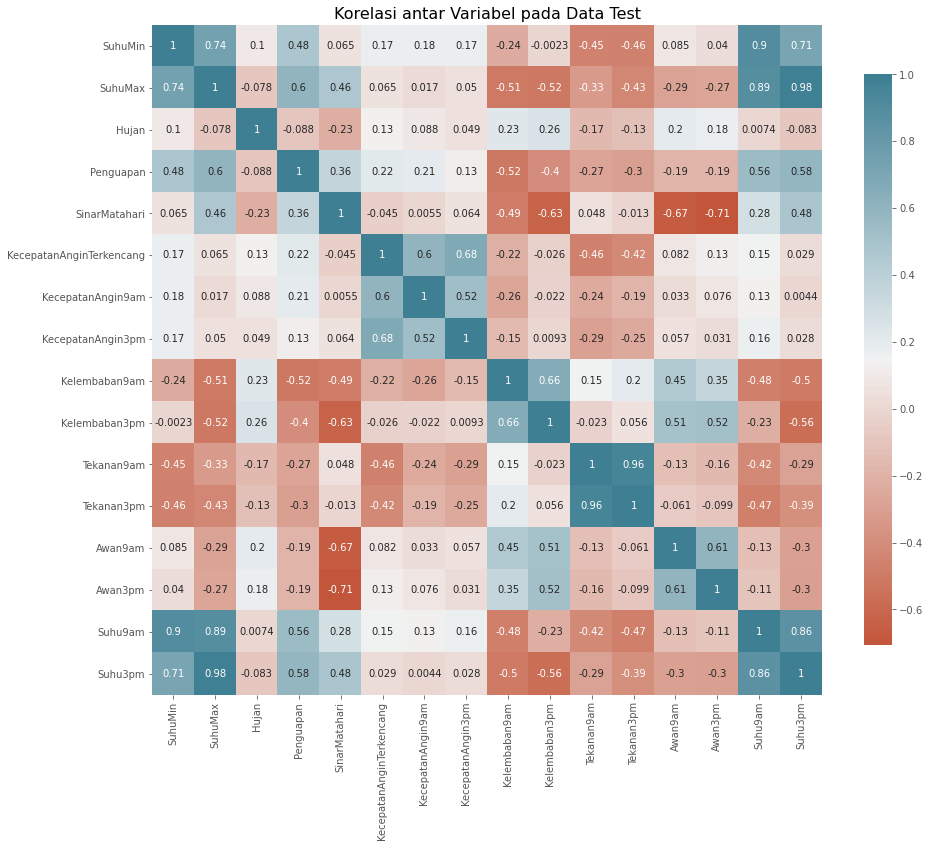

In [ ]:
#korelasi antar variabel
corr = data_test.corr()
f, ax = plt.subplots(figsize=(15,15))
plt.title('Korelasi antar Variabel pada Data Test', y=1, size=16)
ax = sns.heatmap(corr,
                 square=True, 
                 #vmax=0.8,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 annot=True,
                 cbar_kws={'shrink': .7}
                 )

Berdasarkan heatmap di atas dapat dilihat bahwa fitur yang memiliki korelasi tertinggi adalah SuhuMax terhadap Suhu3pm yaitu 0,98 dan selanjutnya suhu9am terhadap SuhuMin 0,9.

In [ ]:
#Menampilkan tabel korelasi antar variabel
dftest_corr = data_test.corr()
dftest_corr

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
SuhuMin,1.000000,0.738536,0.099927,0.475077,0.064727,0.173930,0.177917,0.172400,-0.235668,-0.002285,-0.451365,-0.463758,0.084879,0.040019,0.902194,0.711597
SuhuMax,0.738536,1.000000,-0.077575,0.599676,0.463937,0.064538,0.016787,0.049769,-0.506644,-0.515955,-0.331404,-0.427859,-0.285214,-0.265619,0.887107,0.984856
Hujan,0.099927,-0.077575,1.000000,-0.088491,-0.227580,0.130992,0.088049,0.049252,0.226519,0.256802,-0.165682,-0.125029,0.201795,0.178105,0.007423,-0.082634
Penguapan,0.475077,0.599676,-0.088491,1.000000,0.359877,0.216831,0.205068,0.127416,-0.515855,-0.396955,-0.274538,-0.299329,-0.188765,-0.186781,0.555831,0.582221
SinarMatahari,0.064727,0.463937,-0.227580,0.359877,1.000000,-0.044634,0.005541,0.063788,-0.485749,-0.629103,0.048159,-0.013227,-0.672147,-0.707065,0.284719,0.484811
KecepatanAnginTerkencang,0.173930,0.064538,0.130992,0.216831,-0.044634,1.000000,0.599528,0.681644,-0.218804,-0.026212,-0.461432,-0.418613,0.081665,0.127479,0.151369,0.029335
KecepatanAngin9am,0.177917,0.016787,0.088049,0.205068,0.005541,0.599528,1.000000,0.524180,-0.263281,-0.022407,-0.239506,-0.187427,0.032658,0.075805,0.132505,0.004364
KecepatanAngin3pm,0.172400,0.049769,0.049252,0.127416,0.063788,0.681644,0.524180,1.000000,-0.152969,0.009340,-0.294296,-0.253581,0.057225,0.031429,0.163901,0.027875
Kelembaban9am,-0.235668,-0.506644,0.226519,-0.515855,-0.485749,-0.218804,-0.263281,-0.152969,1.000000,0.662279,0.150981,0.199832,0.446883,0.353813,-0.475923,-0.498216
Kelembaban3pm,-0.002285,-0.515955,0.256802,-0.396955,-0.629103,-0.026212,-0.022407,0.009340,0.662279,1.000000,-0.023482,0.055558,0.512961,0.520305,-0.226798,-0.563266


**Menampilkan outlier pada setiap variabel**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


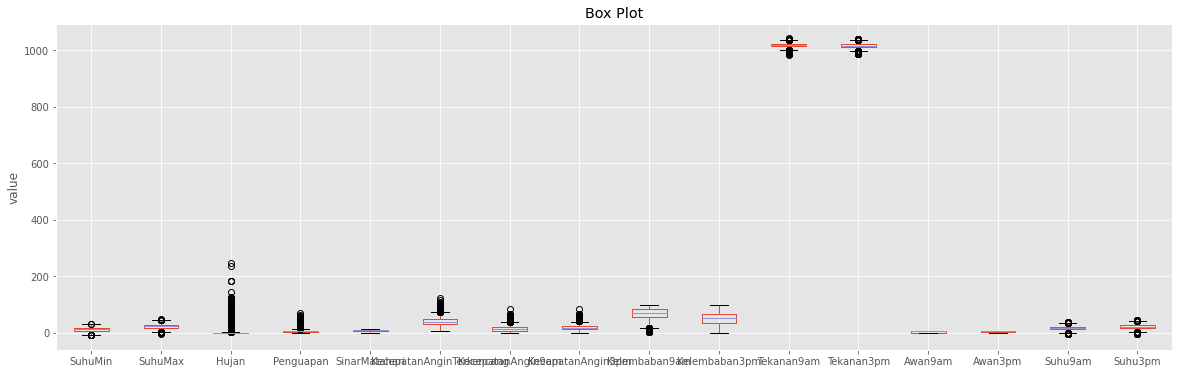

In [ ]:
data_test.plot(kind="box",
              figsize=(20, 6))

plt.title('Box Plot')
plt.ylabel('value')

plt.show()

Berdasarkan box plot di atas, fitur hujan merupakan fitur yang paling banyak memiliki outlier.

#Preprocessing Data

## Missing Value

**Data Train**

In [ ]:
#menghitung jumlah nilai null
data_train.isnull().sum()

SuhuMin                      1122
SuhuMax                       929
Hujan                        2431
Penguapan                   47024
SinarMatahari               52379
KecepatanAnginTerkencang     7696
KecepatanAngin9am            1353
KecepatanAngin3pm            2303
Kelembaban9am                2002
Kelembaban3pm                3374
Tekanan9am                  11327
Tekanan3pm                  11308
Awan9am                     41844
Awan3pm                     44471
Suhu9am                      1340
Suhu3pm                      2698
BersaljuHariIni              2431
BersaljuBesok                2431
dtype: int64

In [ ]:
#menampilkan persentase missing values pada data train
data_train.isna().mean().round(4) * 100

SuhuMin                      1.03
SuhuMax                      0.85
Hujan                        2.23
Penguapan                   43.10
SinarMatahari               48.01
KecepatanAnginTerkencang     7.05
KecepatanAngin9am            1.24
KecepatanAngin3pm            2.11
Kelembaban9am                1.84
Kelembaban3pm                3.09
Tekanan9am                  10.38
Tekanan3pm                  10.37
Awan9am                     38.36
Awan3pm                     40.76
Suhu9am                      1.23
Suhu3pm                      2.47
BersaljuHariIni              2.23
BersaljuBesok                2.23
dtype: float64

Berdasarkan persentase missing value dari data train di atas, terdapat 4 fitur yang memiliki missing values di atas 30% dari keseluruhan data train. Oleh karena itu, dilakukan deleting rows untuk menangani missing value.

In [ ]:
#drop baris data train yang memiliki nilai null
data_train = data_train.dropna()

**Data Test**

In [ ]:
#menghitung jumlah nilai null
data_test.isnull().sum()

SuhuMin                      165
SuhuMax                      165
Hujan                        387
Penguapan                   7856
SinarMatahari               8718
KecepatanAnginTerkencang    1274
KecepatanAngin9am            198
KecepatanAngin3pm            354
Kelembaban9am                330
Kelembaban3pm                548
Tekanan9am                  1865
Tekanan3pm                  1853
Awan9am                     7042
Awan3pm                     7456
Suhu9am                      219
Suhu3pm                      442
BersaljuHariIni              387
BersaljuBesok                419
dtype: int64

In [ ]:
#Menampilkan persentase missing values pada data test 
data_test.isna().mean().round(4) * 100

SuhuMin                      0.91
SuhuMax                      0.91
Hujan                        2.13
Penguapan                   43.21
SinarMatahari               47.95
KecepatanAnginTerkencang     7.01
KecepatanAngin9am            1.09
KecepatanAngin3pm            1.95
Kelembaban9am                1.81
Kelembaban3pm                3.01
Tekanan9am                  10.26
Tekanan3pm                  10.19
Awan9am                     38.73
Awan3pm                     41.01
Suhu9am                      1.20
Suhu3pm                      2.43
BersaljuHariIni              2.13
BersaljuBesok                2.30
dtype: float64

Berdasarkan persentase missing value dari data test di atas, terdapat 4 fitur yang memiliki missing values di atas 30% dari keseluruhan data test. Oleh karena itu, dilakukan deleting rows untuk menangani missing value.

In [ ]:
#Drop baris data test yang memiliki nilai null
data_test = data_test.dropna()

## Categorical Data
Teknik categorical data yang digunakan adalah label encoding. Label encoding bertujuan untuk mengkonversi nilai setiap kolom menjadi angka. Pada kasus ini, kolom yang dipilih dari data train dan data test adalah "BersaljuHariIni" dan "BersaljuBesok", yang mana pada kedua kolom tersebut hanya berisikan dua value yaitu "Ya" dan "Tidak".

In [ ]:
#membuat variabel baru untuk menampung data_train dan data_test
df_train = data_train
df_test = data_test

#mendefinisikan labelencoder
label_encoder = preprocessing.LabelEncoder()

**Data Train**

In [ ]:
#konversi kolom "BersaljuHariIni" dan "BersaljuBesok" dari object menjadi string
df_train['BersaljuHariIni'] = df_train['BersaljuHariIni'].astype('str')
df_train['BersaljuBesok'] = df_train['BersaljuBesok'].astype('str')

#encode label kolom "BersaljuHariIni" dan "BersaljuBesok"
df_train['BersaljuHariIni'] = label_encoder.fit_transform(df_train['BersaljuHariIni'])
df_train['BersaljuBesok'] = label_encoder.fit_transform(df_train['BersaljuBesok'])
  
#menampilkan nilai unique pada kolom "BersaljuHariIni" dan "BersaljuBesok"
df_train['BersaljuHariIni'].unique()
df_train['BersaljuBesok'].unique()

#menampilkan data
df_train

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
3,7.3,24.5,0.0,8.4,10.4,54.0,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,0,0
4,5.9,20.3,0.0,3.6,12.6,37.0,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,0,0
5,14.4,21.8,0.0,3.2,4.4,39.0,19.0,20.0,63.0,52.0,1016.1,1012.5,7.0,7.0,16.7,21.1,0,0
6,7.7,18.7,0.2,5.6,9.7,46.0,19.0,28.0,69.0,31.0,1011.3,1008.8,1.0,1.0,11.3,18.3,0,0
8,18.4,35.3,0.0,10.0,12.5,33.0,11.0,13.0,44.0,18.0,1017.9,1013.4,0.0,0.0,23.7,34.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109080,16.8,34.1,0.0,12.8,10.3,85.0,30.0,37.0,48.0,28.0,1013.4,1009.2,1.0,4.0,25.6,33.0,0,0
109082,8.7,19.0,0.0,1.4,9.6,24.0,22.0,11.0,81.0,59.0,1024.6,1022.3,2.0,2.0,10.8,16.5,0,0
109088,14.3,26.2,0.0,8.0,12.6,50.0,13.0,33.0,51.0,37.0,1019.2,1015.6,0.0,2.0,21.1,25.5,0,0
109090,20.1,23.7,0.0,7.2,8.9,43.0,24.0,26.0,74.0,70.0,1019.3,1017.6,4.0,6.0,22.0,22.1,0,1


In [ ]:
#menampilkan deskripsi statistik dari df_train
df_train.describe()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
count,43677.000000,43677.000000,43677.000000,43677.000000,43677.000000,43677.000000,43677.000000,43677.000000,43677.000000,43677.000000,43677.000000,43677.000000,43677.000000,43677.000000,43677.000000,43677.000000,43677.000000,43677.000000
mean,13.325535,24.104806,2.144934,5.431376,7.691391,40.538750,15.243996,19.604025,66.251551,49.750990,1017.331522,1014.881228,4.247659,4.330380,18.068677,22.603148,0.221123,0.218651
std,6.444730,6.957295,7.123138,3.681680,3.771571,13.397868,8.597095,8.570728,18.594146,20.173461,6.957552,6.914520,2.800402,2.645927,6.587352,6.815915,0.415008,0.413336
min,-6.700000,6.300000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,4.300000,0.000000,0.000000
25%,8.400000,18.600000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,36.000000,1012.700000,1010.100000,1.000000,2.000000,12.900000,17.300000,0.000000,0.000000
50%,13.100000,23.800000,0.000000,4.800000,8.600000,39.000000,15.000000,19.000000,67.000000,51.000000,1017.300000,1014.800000,5.000000,5.000000,17.700000,22.300000,0.000000,0.000000
75%,18.300000,29.500000,0.600000,7.400000,10.700000,48.000000,20.000000,24.000000,80.000000,63.000000,1022.000000,1019.600000,7.000000,7.000000,23.100000,27.800000,0.000000,0.000000
max,30.500000,47.300000,206.200000,72.200000,14.300000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,1.000000,1.000000


**Data Test**

In [ ]:
#konversi kolom "BersaljuHariIni" dan "BersaljuBesok" dari object menjadi string
df_test['BersaljuHariIni'] = df_test['BersaljuHariIni'].astype('str')
df_test['BersaljuBesok'] = df_test['BersaljuBesok'].astype('str')

#encode label kolom "BersaljuHariIni" dan "BersaljuBesok"
df_test['BersaljuHariIni']= label_encoder.fit_transform(df_test['BersaljuHariIni'])
df_test['BersaljuBesok']= label_encoder.fit_transform(df_test['BersaljuBesok'])
  
#menampilkan nilai unique pada kolom "BersaljuHariIni" dan "BersaljuBesok"
df_test['BersaljuHariIni'].unique()
df_test['BersaljuBesok'].unique()

#menampilkan data
df_test

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
2,9.2,27.2,0.0,5.2,10.4,33.0,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,0,0
3,17.7,27.0,0.0,4.6,6.7,35.0,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,0,0
7,14.4,22.4,0.0,4.4,3.9,28.0,9.0,11.0,57.0,51.0,1022.6,1020.7,7.0,7.0,18.3,20.9,0,0
8,20.3,33.7,0.0,11.8,11.1,52.0,20.0,24.0,54.0,33.0,1007.7,1005.6,5.0,5.0,24.6,32.2,0,0
10,8.1,18.2,0.0,1.6,5.1,31.0,11.0,15.0,94.0,48.0,1027.1,1024.5,7.0,7.0,10.3,17.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18170,13.4,24.9,0.0,6.2,9.7,31.0,13.0,13.0,59.0,51.0,1024.2,1022.0,7.0,7.0,23.0,23.7,0,0
18174,14.6,27.8,0.0,6.6,10.1,35.0,13.0,24.0,60.0,56.0,1021.8,1018.6,3.0,2.0,22.8,25.3,0,0
18177,7.8,25.8,0.0,8.0,13.2,31.0,22.0,13.0,59.0,21.0,1017.1,1014.2,6.0,1.0,16.8,24.0,0,0
18178,12.4,26.6,0.0,8.0,11.6,37.0,17.0,20.0,59.0,25.0,1022.2,1018.7,1.0,1.0,17.1,25.7,0,0


In [ ]:
#menampilkan deskripsi statistik dari df_test
df_test.describe()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
count,7225.000000,7225.000000,7225.000000,7225.000000,7225.000000,7225.000000,7225.000000,7225.000000,7225.000000,7225.000000,7225.000000,7225.000000,7225.000000,7225.000000,7225.000000,7225.000000,7225.000000,7225.000000
mean,13.445702,24.283571,2.130671,5.516014,7.702893,40.551280,15.125398,19.453010,66.078062,49.681246,1017.195474,1014.727488,4.273356,4.333287,18.203363,22.770450,0.218685,0.226436
std,6.535316,7.036396,6.862214,3.751701,3.772548,13.288108,8.423376,8.516094,18.695719,20.472968,6.971964,6.939331,2.806147,2.661803,6.647018,6.908303,0.413383,0.418553
min,-4.700000,7.700000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,2.000000,2.000000,984.400000,986.600000,0.000000,0.000000,0.600000,4.800000,0.000000,0.000000
25%,8.400000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.600000,1010.000000,1.000000,2.000000,13.100000,17.300000,0.000000,0.000000
50%,13.200000,24.000000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,51.000000,1017.100000,1014.500000,5.000000,5.000000,17.800000,22.500000,0.000000,0.000000
75%,18.500000,29.800000,0.600000,7.400000,10.700000,48.000000,20.000000,24.000000,79.000000,63.000000,1021.700000,1019.300000,7.000000,7.000000,23.400000,28.000000,0.000000,0.000000
max,29.600000,48.100000,128.000000,59.800000,14.500000,115.000000,65.000000,65.000000,100.000000,100.000000,1040.300000,1037.600000,8.000000,8.000000,37.700000,46.100000,1.000000,1.000000


Dapat diliat pada kedua tabel diatas, hasil yang diperoleh dari label encoding pada kolom "BesaljuHariIni" dan "BersaljuBesok" berupa nilai 0 dan 1 untuk "Tidak" dan "Ya".

**Visualisasi menggunakan pie chart**

0    34019
1     9658
Name: BersaljuHariIni, dtype: int64

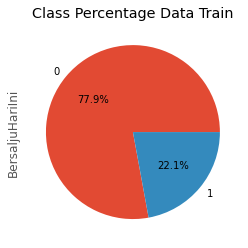

In [ ]:
#plot df_train pada kolom "BersaljuHariIni", kemudian dihitung jumlah setiap valuenya
df_train['BersaljuHariIni'].value_counts().plot(kind='pie',
                                                autopct='%1.1f%%'
                                               )
plt.title("Class Percentage Data Train")
df_train['BersaljuHariIni'].value_counts()

Berdasarkan pie chart di atas untuk kolom Bersalju Hari ini memiliki nilai Tidak atau 0 sebanyak 77,9% dari keseluruhan data pada data train

0    34019
1     9658
Name: BersaljuHariIni, dtype: int64

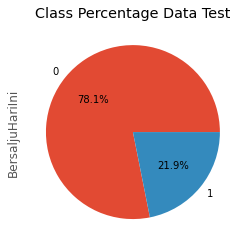

In [ ]:
#plot df_test pada kolom "BersaljuHariIni", kemudian dihitung jumlah setiap valuenya
df_test['BersaljuHariIni'].value_counts().plot(kind='pie',
                                               autopct='%1.1f%%'
                                              )
plt.title("Class Percentage Data Test")
df_train['BersaljuHariIni'].value_counts()

Berdasarkan pie chart di atas untuk kolom Bersalju Hari ini memiliki nilai Tidak atau 0 sebanyak 78,1% dari keseluruhan data pada data test

0    34127
1     9550
Name: BersaljuBesok, dtype: int64

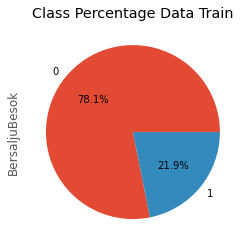

In [ ]:
#plot df_train pada kolom "BersaljuBesok", kemudian dihitung jumlah setiap valuenya
df_train['BersaljuBesok'].value_counts().plot(kind='pie',
                                              autopct='%1.1f%%'
                                             )
plt.title("Class Percentage Data Train")
df_train['BersaljuBesok'].value_counts()

Berdasarkan pie chart di atas untuk kolom Bersalju Besok memiliki nilai Tidak atau 0 sebanyak 78,1% dari keseluruhan data pada data train

0    34127
1     9550
Name: BersaljuBesok, dtype: int64

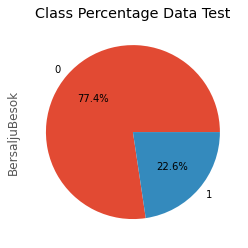

In [ ]:
#plot df_test pada kolom "BersaljuBesok", kemudian dihitung jumlah setiap valuenya
df_test['BersaljuBesok'].value_counts().plot(kind='pie',
                                             autopct='%1.1f%%'
                                            )
plt.title("Class Percentage Data Test")
df_train['BersaljuBesok'].value_counts()

Berdasarkan pie chart di atas untuk kolom Bersalju Besok memiliki nilai Tidak atau 0 sebanyak 77,4% dari keseluruhan data pada data train

## Normalisasi Data
Normalisasi bertujuan untuk menghindari error pada data yang rentang nilainya terlalu jauh. Hasil yang akan diperoleh dari normalisasi berupa nilai dengan range 0 hingga 1. Pada kasus ini, teknik normalisasi yang akan digunakan adalah Min-Max Scaling.

In [ ]:
#mendefinisikan MinMaxScaler
scaler = MinMaxScaler()

#melakukan fit dan transform
df_train[['SuhuMin', 'SuhuMin', 'SuhuMin', 'Penguapan', 'SinarMatahari', 'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm', 'Kelembaban9am', 'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am', 'Awan3pm', 'Suhu9am', 'Suhu3pm']] = scaler.fit_transform(df_train[['SuhuMin', 'SuhuMin', 'SuhuMin', 'Penguapan', 'SinarMatahari', 'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm', 'Kelembaban9am', 'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am', 'Awan3pm', 'Suhu9am', 'Suhu3pm']])

#menampilkan 5 data pertama
df_train.head(5)

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
3,0.376344,24.5,0.0,0.116343,0.727273,0.391304,0.194030,0.250000,0.25,0.17,0.646077,0.644013,0.125,0.777778,0.399002,0.452153,0,0
4,0.338710,20.3,0.0,0.049861,0.881119,0.243478,0.328358,0.250000,0.55,0.48,0.654424,0.608414,0.250,0.666667,0.326683,0.330144,0,0
5,0.567204,21.8,0.0,0.044321,0.307692,0.260870,0.283582,0.263158,0.63,0.52,0.594324,0.572816,0.875,0.777778,0.433915,0.401914,0,0
6,0.387097,18.7,0.2,0.077562,0.678322,0.321739,0.283582,0.368421,0.69,0.31,0.514190,0.512945,0.125,0.111111,0.299252,0.334928,0,0
8,0.674731,35.3,0.0,0.138504,0.874126,0.208696,0.164179,0.171053,0.44,0.18,0.624374,0.587379,0.000,0.000000,0.608479,0.732057,0,0


In [ ]:
#data test

#melakukan fit dan transform
df_test[['SuhuMin', 'SuhuMin', 'SuhuMin', 'Penguapan', 'SinarMatahari', 'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm', 'Kelembaban9am', 'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am', 'Awan3pm', 'Suhu9am', 'Suhu3pm']] = scaler.fit_transform(df_test[['SuhuMin', 'SuhuMin', 'SuhuMin', 'Penguapan', 'SinarMatahari', 'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm', 'Kelembaban9am', 'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am', 'Awan3pm', 'Suhu9am', 'Suhu3pm']])

#menampilkan 5 data pertama
df_test.head(5)

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
2,0.405248,27.2,0.0,0.086957,0.717241,0.211538,0.200000,0.292308,0.887755,0.255102,0.611807,0.570588,0.000,0.125,0.358491,0.520581,0,0
3,0.653061,27.0,0.0,0.076923,0.462069,0.230769,0.307692,0.230769,0.540816,0.397959,0.461538,0.431373,0.875,0.750,0.584906,0.523002,0,0
7,0.556851,22.4,0.0,0.073579,0.268966,0.163462,0.138462,0.169231,0.561224,0.500000,0.683363,0.668627,0.875,0.875,0.477089,0.389831,0,0
8,0.728863,33.7,0.0,0.197324,0.765517,0.394231,0.307692,0.369231,0.530612,0.316327,0.416816,0.372549,0.625,0.625,0.646900,0.663438,0,0
10,0.373178,18.2,0.0,0.026756,0.351724,0.192308,0.169231,0.230769,0.938776,0.469388,0.763864,0.743137,0.875,0.875,0.261456,0.312349,0,0


## Menghapus Outlier
Penghapusan outlier dilakukan dengan cara menghitung nilai zscore.

In [ ]:
#data train

#menghitung nilai zscore
z = np.abs(stats.zscore(df_train[['SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan', 'SinarMatahari', 'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm', 'Kelembaban9am', 'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am', 'Awan3pm', 'Suhu9am', 'Suhu3pm']]))
df_train = df_train[(z < 3).all(axis=1)]

#data_test

#menghitung nilai zscore
z = np.abs(stats.zscore(df_test[['SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan', 'SinarMatahari', 'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm', 'Kelembaban9am', 'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am', 'Awan3pm', 'Suhu9am', 'Suhu3pm']]))
df_test = df_test[(z < 3).all(axis=1)]

In [ ]:
#menampilkan tuple dimensi array
df_train.shape

(41348, 18)

Setelah melewati tahap preprocessing secara keseluruhan, didapatkan hasil bahwa data untuk train memiliki 41348 baris dan 18 kolom

In [ ]:
#menampilkan tuple dimensi array
df_test.shape

(6797, 18)

Setelah melewati tahap preprocessing secara keseluruhan, didapatkan hasil bahwa data untuk test memiliki 6797 baris dan 18 kolom

**Menampilkan hasil korelasi variabel data setelah tahap preprocessing**

In [ ]:
#data train
corr_train = df_train.corr()
corr_train

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
SuhuMin,1.000000,0.749868,0.070942,0.542940,0.084581,0.148863,0.146958,0.172255,-0.186887,0.081728,-0.505424,-0.520579,0.110486,0.045308,0.909223,0.727363,0.042210,0.083689
SuhuMax,0.749868,1.000000,-0.141236,0.690291,0.471261,0.065732,0.016942,0.048795,-0.492459,-0.437365,-0.391722,-0.488377,-0.256658,-0.254435,0.890642,0.985332,-0.217023,-0.141455
Hujan,0.070942,-0.141236,1.000000,-0.166235,-0.252077,0.122123,0.066900,0.063132,0.295707,0.299560,-0.172501,-0.108261,0.232904,0.201060,-0.041663,-0.145755,0.724568,0.261785
Penguapan,0.542940,0.690291,-0.166235,1.000000,0.404805,0.239215,0.206356,0.162012,-0.586647,-0.427923,-0.340836,-0.369101,-0.202921,-0.217970,0.635353,0.668078,-0.237779,-0.135916
SinarMatahari,0.084581,0.471261,-0.252077,0.404805,1.000000,-0.012538,0.016482,0.066504,-0.494547,-0.621614,0.012821,-0.051309,-0.673858,-0.698900,0.295189,0.492772,-0.307123,-0.435628
KecepatanAnginTerkencang,0.148863,0.065732,0.122123,0.239215,-0.012538,1.000000,0.586858,0.679203,-0.212773,-0.052185,-0.395537,-0.347587,0.073791,0.110809,0.118769,0.032112,0.135792,0.207052
KecepatanAngin9am,0.146958,0.016942,0.066900,0.206356,0.016482,0.586858,1.000000,0.475557,-0.251512,-0.057715,-0.176688,-0.131233,0.024961,0.047726,0.088100,0.007221,0.085798,0.067787
KecepatanAngin3pm,0.172255,0.048795,0.063132,0.162012,0.066504,0.679203,0.475557,1.000000,-0.114334,0.029846,-0.277442,-0.235784,0.052620,0.021831,0.154802,0.028091,0.077995,0.069309
Kelembaban9am,-0.186887,-0.492459,0.295707,-0.586647,-0.494547,-0.212773,-0.251512,-0.114334,1.000000,0.667644,0.131710,0.187746,0.425903,0.339311,-0.426906,-0.484725,0.353580,0.251362
Kelembaban3pm,0.081728,-0.437365,0.299560,-0.427923,-0.621614,-0.052185,-0.057715,0.029846,0.667644,1.000000,-0.058793,0.028943,0.501478,0.505669,-0.134875,-0.487278,0.360089,0.443584


In [ ]:
#menampung korelasi fitur "BersaljuBesok" pada cor_target_train
cor_target_train = corr_train['BersaljuBesok']
#memilih fitur yang memiliki korelasi lebih dari 0,3 (korelasi tinggi)
relevant_features_train = cor_target_train[cor_target_train>0.3]
relevant_features_train

Kelembaban3pm    0.443584
Awan9am          0.311049
Awan3pm          0.374282
BersaljuBesok    1.000000
Name: BersaljuBesok, dtype: float64

In [ ]:
#data test
corr_test = df_test.corr()
corr_test

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
SuhuMin,1.000000,0.753650,0.061848,0.550080,0.085131,0.153631,0.157399,0.166255,-0.186668,0.072149,-0.510568,-0.525057,0.115229,0.051069,0.910309,0.731884,0.030903,0.106108
SuhuMax,0.753650,1.000000,-0.136977,0.695074,0.468265,0.077957,0.026010,0.046877,-0.498541,-0.441897,-0.400696,-0.496892,-0.249014,-0.253304,0.890914,0.985911,-0.221524,-0.122725
Hujan,0.061848,-0.136977,1.000000,-0.165230,-0.235080,0.121714,0.053407,0.055768,0.293266,0.294975,-0.147173,-0.082964,0.218842,0.195658,-0.045205,-0.143745,0.725251,0.247362
Penguapan,0.550080,0.695074,-0.165230,1.000000,0.394071,0.251949,0.211636,0.163705,-0.585815,-0.427772,-0.345931,-0.377725,-0.196485,-0.226535,0.641074,0.674862,-0.249385,-0.118995
SinarMatahari,0.085131,0.468265,-0.235080,0.394071,1.000000,-0.022656,0.007905,0.070471,-0.491545,-0.620147,0.011007,-0.055315,-0.668786,-0.698654,0.296004,0.490428,-0.290364,-0.430779
KecepatanAnginTerkencang,0.153631,0.077957,0.121714,0.251949,-0.022656,1.000000,0.569059,0.660254,-0.227878,-0.065904,-0.395896,-0.355150,0.073849,0.107582,0.129429,0.047256,0.108447,0.216193
KecepatanAngin9am,0.157399,0.026010,0.053407,0.211636,0.007905,0.569059,1.000000,0.474314,-0.246238,-0.051698,-0.187921,-0.143531,0.030336,0.061555,0.102163,0.017260,0.064800,0.077267
KecepatanAngin3pm,0.166255,0.046877,0.055768,0.163705,0.070471,0.660254,0.474314,1.000000,-0.125096,0.011843,-0.254360,-0.215633,0.047083,0.009936,0.151641,0.032419,0.054349,0.049244
Kelembaban9am,-0.186668,-0.498541,0.293266,-0.585815,-0.491545,-0.227878,-0.246238,-0.125096,1.000000,0.672471,0.143220,0.204017,0.423895,0.348373,-0.429519,-0.494815,0.349766,0.236661
Kelembaban3pm,0.072149,-0.441897,0.294975,-0.427772,-0.620147,-0.065904,-0.051698,0.011843,0.672471,1.000000,-0.051549,0.041333,0.491984,0.513449,-0.141466,-0.493018,0.356098,0.443653


In [ ]:
#menampung korelasi fitur "BersaljuBesok" pada cor_target_test
cor_target_test = corr_test['BersaljuBesok']
#memilih fitur yang memiliki korelasi lebih dari 0,3 (korelasi tinggi)
relevant_features_test = cor_target_test[cor_target_test>0.3]
relevant_features_test

Kelembaban3pm    0.443653
Awan9am          0.300337
Awan3pm          0.378940
BersaljuBesok    1.000000
Name: BersaljuBesok, dtype: float64

## Split Data

In [ ]:
x_train = df_train.loc[:, df_train.columns != 'BersaljuBesok']
y_train = df_train["BersaljuBesok"]

x_test = df_test.loc[:, df_test.columns != 'BersaljuBesok']
y_test= df_test["BersaljuBesok"]

# Pemodelan
---
Prediksi model dilakukan menggunakan 6 metode, diantaranya yaitu K-Nearest Neighbors (KNN), Decision Tree, Random Forest, Support Vector Machine (SVM), AdaBoost, dan Gradient Boosting.

**Train Model**


In [ ]:
def train_model(model, X_train, X_test, y_train, y_test):
    model = model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_acc = model.score(X_train, y_train)
    train_f1 = f1_score(y_train, train_pred)
    train_precision = precision_score(y_train, train_pred)
    train_recall = recall_score(y_train, train_pred)

    test_pred = model.predict(X_test)
    test_acc = model.score(X_test, y_test)
    test_f1 = f1_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)

    print("==== Training Performance ====")
    print("Accuracy Score:", train_acc)
    print("F1 Score:", train_f1)
    print("Precision Score:", train_precision)
    print("Recall Score:", train_recall)
    
    print()
    print("==== Test Performance ====")
    print("Accuracy Score:", test_acc)
    print("F1 Score:", test_f1)
    print("Precision Score:", test_precision)
    print("Recall Score:", test_recall)
    
    print()
    print(classification_report(y_test, test_pred))
    #print(confusion_matrix(y_test, test_pred))
    return test_acc, test_recall, model, train_pred, test_pred

**K-Nearest Neighbors (KNN)**

In [ ]:
knn = KNeighborsClassifier()
knn1_acc, knn1_recall, model_knn1, train_pred_knn1, test_pred_knn1 = train_model(knn, x_train, x_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 0.8751088323498114
F1 Score: 0.6421344421344422
Precision Score: 0.7783938172043011
Recall Score: 0.5464732248171739

==== Test Performance ====
Accuracy Score: 0.8184493158746505
F1 Score: 0.5079744816586923
Precision Score: 0.5876383763837638
Recall Score: 0.4473314606741573

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      5373
           1       0.59      0.45      0.51      1424

    accuracy                           0.82      6797
   macro avg       0.72      0.68      0.70      6797
weighted avg       0.80      0.82      0.81      6797



Berdasarkan klasifikasi menggunakan KNN, didapatkan hasil akurasi sebesar 87.5% dan 81.8% untuk data train dan data test.

---

**Decision Tree**

In [ ]:
dst = DecisionTreeClassifier()
dst1_acc, dst1_recall, model_dst1, train_pred_dst1, test_pred_dst1 = train_model(dst, x_train, x_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0

==== Test Performance ====
Accuracy Score: 0.7573929674856554
F1 Score: 0.495255586164677
Precision Score: 0.4389582202930005
Recall Score: 0.5681179775280899

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      5373
           1       0.44      0.57      0.50      1424

    accuracy                           0.76      6797
   macro avg       0.66      0.69      0.67      6797
weighted avg       0.78      0.76      0.77      6797



Berdasarkan klasifikasi menggunakan Decision Tree, didapatkan hasil akurasi sebesar 100% untuk data train dan 75.5% untuk data test.

---

**Random Forest**

In [ ]:
randfor = RandomForestClassifier()
randfor1_acc, randfor1_recall, model_randfor1, train_pred_randfor1, test_pred_randfor1 = train_model(randfor, x_train, x_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 0.9999516300667505
F1 Score: 0.9998820337383508
Precision Score: 1.0
Recall Score: 0.9997640953054966

==== Test Performance ====
Accuracy Score: 0.8534647638664117
F1 Score: 0.6151468315301392
Precision Score: 0.6838487972508591
Recall Score: 0.5589887640449438

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5373
           1       0.68      0.56      0.62      1424

    accuracy                           0.85      6797
   macro avg       0.79      0.75      0.76      6797
weighted avg       0.85      0.85      0.85      6797



Berdasarkan klasifikasi menggunakan Random Forest, didapatkan hasil akurasi sebesar 99.9% dan 85.3% untuk data train dan data test.

---

**Support Vector Machine (SVM)**

In [ ]:
svm = SVC()
svm1_acc, svm1_recall, model_svm1, train_pred_svm1, test_pred_svm1 = train_model(svm, x_train, x_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 0.8200396633452646
F1 Score: 0.29582663007476107
Precision Score: 0.7482048827190043
Recall Score: 0.18435951875442322

==== Test Performance ====
Accuracy Score: 0.8135942327497425
F1 Score: 0.29571984435797666
Precision Score: 0.7093333333333334
Recall Score: 0.18679775280898878

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      5373
           1       0.71      0.19      0.30      1424

    accuracy                           0.81      6797
   macro avg       0.76      0.58      0.59      6797
weighted avg       0.80      0.81      0.77      6797



Berdasarkan klasifikasi menggunakan SVM, didapatkan hasil akurasi sebesar 82% dan 81.3% untuk data train dan data test.

---

**AdaBoost**

In [ ]:
abc = AdaBoostClassifier()
ada1_acc, ada1_recall, model_ada1, train_pred_ada1, test_pred_ada1 = train_model(abc, x_train, x_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 0.8553497146173938
F1 Score: 0.5787138127773473
Precision Score: 0.7183073963979717
Recall Score: 0.48454824251002593

==== Test Performance ====
Accuracy Score: 0.8427247314991908
F1 Score: 0.6074182886522218
Precision Score: 0.636643571978445
Recall Score: 0.5807584269662921

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      5373
           1       0.64      0.58      0.61      1424

    accuracy                           0.84      6797
   macro avg       0.76      0.75      0.75      6797
weighted avg       0.84      0.84      0.84      6797



Berdasarkan klasifikasi menggunakan AdaBoost, didapatkan hasil akurasi sebesar 85.5% dan 84.2% untuk data train dan data test.

---

**Gradient Boosting**

In [ ]:
gb = GradientBoostingClassifier()
gb1_acc, gb1_recall, model_gb1, train_pred_gb1, test_pred_gb1= train_model(gb, x_train, x_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 0.864854406500919
F1 Score: 0.6055900621118012
Precision Score: 0.7539543057996485
Recall Score: 0.5060155697098372

==== Test Performance ====
Accuracy Score: 0.8536118875974694
F1 Score: 0.626641651031895
Precision Score: 0.6728444802578566
Recall Score: 0.586376404494382

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      5373
           1       0.67      0.59      0.63      1424

    accuracy                           0.85      6797
   macro avg       0.78      0.76      0.77      6797
weighted avg       0.85      0.85      0.85      6797



Berdasarkan klasifikasi menggunakan GradientBoosting, didapatkan hasil akurasi sebesar 86.4% dan 85.3% untuk data train dan data test.

## Hyperparameter Tuning
---
Berdasarkan hasil akurasi dari kelima metode diatas, nilai yang diperoleh bisa dibilang belum cukup bagus. Oleh karena itu, dilakukan tuning parameter untuk mendapatkan nilai parameter yang optimal. Dalam melakukan tuning parameter, terdapat dua pendekatan yang akan digunakan, yaitu Grid Search dan Random Search.

1. **K-Nearest Neighbors (KNN)** menggunakan pendekatan Grid Search
2. **Decision Tree** menggunakan pendekatan Grid Search
3. **Support Vector Machine (SVM)** menggunakan pendekatan Random Search
4. **AdaBoost** menggunakan pendekatan Grid Search
5. **Gradient Boosting** menggunakan pendekatan Random Search





**K-Nearest Neighbors (KNN)**

In [ ]:
#mendefinisikan KNeighborsClassifier
model = KNeighborsClassifier()
#membuat list hyperparameter yang akan di tune
leaf_size = list(range(1,5))
n_neighbors = list(range(5,10))
p = [1,2]
#melakukan konversi ke dictionary
params = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#gunakan GridSearchCV untuk mencari parameter terbaik
model1 = GridSearchCV(model, param_grid=params, cv=5)
#training data x_train dan y_train
model1.fit(x_train, y_train)
#print value dari best estimator dan best hyperparamater
print("Best Estimator:\n", model1.best_estimator_)
print("Best Hyperparameters:\n", model1.best_params_)

Best Estimator:
 KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='uniform')
Best Hyperparameters:
 {'leaf_size': 1, 'n_neighbors': 9, 'p': 1}


Berdasarkan tuning parameter menggunakan klasifikasi KNN, didapatkan hasil parameter terbaik yaitu leaf_size=1, n_neighbors=9, dan p=1.

In [ ]:
knn2 = KNeighborsClassifier(leaf_size=1, n_neighbors=9, p=1, weights="uniform")
knn2_acc, knn2_recall, model_knn2, train_pred_knn2, test_pred_knn2 = train_model(knn2, x_train, x_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 0.8647334816677953
F1 Score: 0.5960857947569871
Precision Score: 0.7686720059601415
Recall Score: 0.4867893371078085

==== Test Performance ====
Accuracy Score: 0.8343386788288951
F1 Score: 0.5296574770258982
Precision Score: 0.6536082474226804
Recall Score: 0.4452247191011236

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5373
           1       0.65      0.45      0.53      1424

    accuracy                           0.83      6797
   macro avg       0.76      0.69      0.71      6797
weighted avg       0.82      0.83      0.82      6797



Berdasarkan klasifikasi menggunakan KNN dengan parameter terbaik, didapatkan hasil akurasi sebesar 86.4% dan 83.4% untuk data train dan data test.

---

**Decision Tree**

In [ ]:
#mendefinisikan DecisionTreeClassifier
model= DecisionTreeClassifier(random_state=1234)
#set hyperparameter
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}
#gunakan GridSearchCV untuk mencari parameter terbaik
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#training data x_train dan y_train
model1.fit(x_train, y_train)
#print value dari best estimator dan best hyperparamater
print("Best Estimator:\n",model1.best_estimator_)
print("Best Hyperparameters:\n",model1.best_params_)

Best Estimator:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
Best Hyperparameters:
 {'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 123}


Berdasarkan tuning parameter menggunakan klasifikasi Decision Tree, didapatkan hasil parameter terbaik yaitu max_features=auto, min_samples_leaf=10, min_samples_split=2, dan random_state=123.

In [ ]:
dst2 = DecisionTreeClassifier(max_features="auto", min_samples_leaf=10, min_samples_split=2, random_state=123)
dst2_acc, dst2_recall, model_dst2, train_pred_dst2, test_pred_dst2 = train_model(dst2, x_train, x_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 0.8879510496275516
F1 Score: 0.698077549690453
Precision Score: 0.7799621377603029
Recall Score: 0.6317527718801604

==== Test Performance ====
Accuracy Score: 0.8165367073708989
F1 Score: 0.5554367201426025
Precision Score: 0.5640839971035482
Recall Score: 0.5470505617977528

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      5373
           1       0.56      0.55      0.56      1424

    accuracy                           0.82      6797
   macro avg       0.72      0.72      0.72      6797
weighted avg       0.81      0.82      0.82      6797



Berdasarkan klasifikasi menggunakan Decision Tree dengan parameter terbaik, didapatkan hasil akurasi sebesar 88.7% dan 81.6% untuk data train dan data test.

---

**Random Forest**

In [ ]:
#mendefinisikan RandomForestClassifier
model=RandomForestClassifier()
#set hyperparameter
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#gunakan GridSearchCV untuk mencari parameter terbaik
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#training data x_train dan y_train
model1.fit(x_train, y_train)
#print value dari best estimator dan best hyperparamater
print("Best Estimator:\n",model1.best_estimator_)
print("Best Hyperparameters:\n",model1.best_params_)

Best Estimator:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
Best Hyperparameters:
 {'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 123}


Berdasarkan tuning parameter menggunakan klasifikasi Random Forest, didapatkan hasil parameter terbaik yaitu criterion=entropy, min_samples_leaf=2, min_samples_split=3, n_estimators=30, n_jobs=-1, dan random_state=123.

In [ ]:
randfor2 = RandomForestClassifier(criterion="entropy", min_samples_leaf=2, min_samples_split=3, n_estimators=30, n_jobs=-1, random_state=123)
randfor2_acc, randfor2_recall, model_randfor2, train_pred_randfor2, test_pred_randfor2 = train_model(randfor2, x_train, x_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 0.9889232852858663
F1 Score: 0.9723730244902883
Precision Score: 0.9950617283950617
Recall Score: 0.9506959188487851

==== Test Performance ====
Accuracy Score: 0.850669412976313
F1 Score: 0.6067415730337079
Precision Score: 0.6767502160760588
Recall Score: 0.5498595505617978

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5373
           1       0.68      0.55      0.61      1424

    accuracy                           0.85      6797
   macro avg       0.78      0.74      0.76      6797
weighted avg       0.84      0.85      0.84      6797



Berdasarkan klasifikasi menggunakan Random Forest dengan parameter terbaik, didapatkan hasil akurasi sebesar 98.8% dan 85% untuk data train dan data test.

---

**Support Vector Machine (SVM)**

In [ ]:
#mendefinisikan SVC
model = SVC(random_state=1)
#set hyperparameter
params = {'C': [0.1,1,100], 
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
#gunakan RandomizedSearchCV untuk mencari parameter terbaik
model1 = RandomizedSearchCV(model, params, refit = True, cv=5)
#training data x_train dan y_train
model1.fit(x_train,y_train)
#print value dari best estimator dan best hyperparamater
print("Best Estimator:\n",model1.best_estimator_)
print("Best Hyperparameters:\n",model1.best_params_)

Best Estimator:
 SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)
Best Hyperparameters:
 {'gamma': 0.01, 'C': 100}


Berdasarkan tuning parameter menggunakan klasifikasi SVM, didapatkan hasil parameter terbaik yaitu gamma=0.01 dan C=100.

In [ ]:
svm2 = SVC(gamma=0.01, C=100)
svm2_acc, svm2_recall, model_svm2, train_pred_svm2, test_pred_svm2 = train_model(svm2, x_train, x_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 0.8611782915739576
F1 Score: 0.5734244946492271
Precision Score: 0.7750100441944556
Recall Score: 0.45506015569709835

==== Test Performance ====
Accuracy Score: 0.8567014859496836
F1 Score: 0.6110223642172524
Precision Score: 0.7083333333333334
Recall Score: 0.5372191011235955

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5373
           1       0.71      0.54      0.61      1424

    accuracy                           0.86      6797
   macro avg       0.80      0.74      0.76      6797
weighted avg       0.85      0.86      0.85      6797



Berdasarkan klasifikasi menggunakan SVM dengan parameter terbaik, didapatkan hasil akurasi sebesar 86.1% dan 85.6% untuk data train dan data test.

---

**AdaBoost**

In [ ]:
#mendefinisikan AdaBoostClassifier
model = AdaBoostClassifier()
#set hyperparameter
grid_params = {'n_estimators': [100,200,300],
               'learning_rate':[.001,0.01,.1]}
#gunakan GridSearchCV untuk mencari parameter terbaik
model1 = GridSearchCV(estimator = model, param_grid = grid_params, scoring = 'accuracy', cv = 3, n_jobs = -1)
#training data x_train dan y_train
model1.fit(x_train, y_train)
#print value dari best estimator dan best hyperparamater
print("Best Estimator:\n",model1.best_estimator_)
print("Best Hyperparameters:\n",model1.best_params_)

Best Estimator:
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=300, random_state=None)
Best Hyperparameters:
 {'learning_rate': 0.1, 'n_estimators': 300}


Berdasarkan tuning parameter menggunakan klasifikasi AdaBoost, didapatkan hasil parameter terbaik yaitu learning_rate=0.1 dan n_estimators=300.

In [ ]:
abc2 = AdaBoostClassifier(n_estimators=300, learning_rate=0.1)
ada2_acc, ada2_recall, model_ada2, train_pred_ada2, test_pred_ada2 = train_model(abc2, x_train, x_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 0.8575505465802458
F1 Score: 0.5781406675261423
Precision Score: 0.7359591539022611
Recall Score: 0.4760556735079028

==== Test Performance ====
Accuracy Score: 0.8505222892452553
F1 Score: 0.610727969348659
Precision Score: 0.6720067453625632
Recall Score: 0.5596910112359551

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5373
           1       0.67      0.56      0.61      1424

    accuracy                           0.85      6797
   macro avg       0.78      0.74      0.76      6797
weighted avg       0.84      0.85      0.85      6797



Berdasarkan klasifikasi menggunakan AdaBoost dengan parameter terbaik, didapatkan hasil akurasi sebesar 85.7% dan 85% untuk data train dan data test.

---

**Gradient Boosting**

In [ ]:
#mendefinisikan GradientBoostingClassifier
model=GradientBoostingClassifier(random_state=1)
#membuat list hyperparameter yang akan di tune
num_estimators = [500,1000]
learn_rates = [0.02, 0.05]
max_depths = [1, 2]
#set hyperparameter
param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths}
#gunakan RandomizedSearchCV untuk mencari parameter terbaik
model1 =RandomizedSearchCV(model, param_grid, cv=5)
model1.fit(x_train,y_train)
#print value dari best estimator dan best hyperparamater
print("Best Estimator:\n",model1.best_estimator_)
print("Best Hyperparameters:\n",model1.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best Estimator:
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Best Hyperparameters:
 {'n_estimators': 1000, 'max_depth': 2, 'learning_rate': 0.05}


Berdasarkan tuning parameter menggunakan klasifikasi GradientBoosting, didapatkan hasil parameter terbaik yaitu n_estimators=1000, max_dept=2, dan learning_rate=0.05.

In [ ]:
gb2 = GradientBoostingClassifier(n_estimators=1000, max_depth=2, learning_rate=0.05)
gb2_acc, gb2_recall, model_gb2, train_pred_gb2, test_pred_gb2= train_model(gb2, x_train, x_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 0.8690625906936248
F1 Score: 0.6216102879507968
Precision Score: 0.762778730703259
Recall Score: 0.5245340882283558

==== Test Performance ====
Accuracy Score: 0.8511107841694865
F1 Score: 0.6413890857547838
Precision Score: 0.6473533619456366
Recall Score: 0.6355337078651685

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      5373
           1       0.65      0.64      0.64      1424

    accuracy                           0.85      6797
   macro avg       0.78      0.77      0.77      6797
weighted avg       0.85      0.85      0.85      6797



Berdasarkan klasifikasi menggunakan GradienBoosting dengan parameter terbaik, didapatkan hasil akurasi sebesar 86.9% dan 85.1% untuk data train dan data test.

# Evaluasi

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
  # Menambahkan teks di dalam kotak confusion matrix
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    if sum_stats:
        #Menghitung akurasi
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #Jika data merupakan data biner (0,1)
        if len(cf)==2:
            #Menghitung dan menampilkan precision, recall, f1 score
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    #Set figure parameter
    if figsize==None:
        #Menggunakan figsize default jika tidak diset
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Tidak menampilkan categories jika xyticks
        categories=False


    # Visualiasi confusion matrix dengan heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

Confusion Matrix untuk KNN hasil tuning

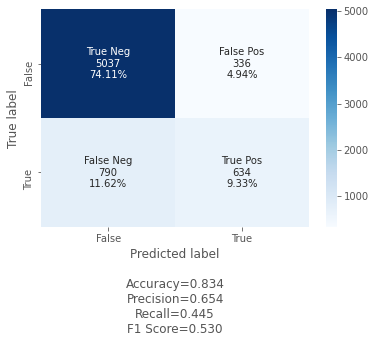

In [ ]:
cf_matrix_knn2 = confusion_matrix(y_test, test_pred_knn2)
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["False", "True"]
make_confusion_matrix(cf_matrix_knn2, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Blues")

Confusion Matrix untuk Decision Tree hasil tuning

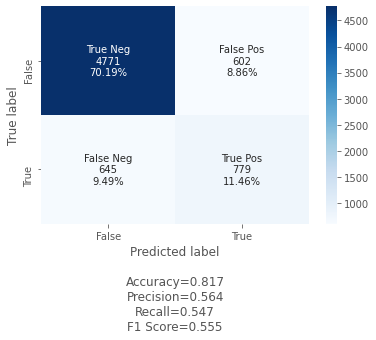

In [ ]:
cf_matrix_dst2 = confusion_matrix(y_test, test_pred_dst2)
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["False", "True"]
make_confusion_matrix(cf_matrix_dst2, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Blues")

Confusion Matrix untuk Random Forest hasil tuning

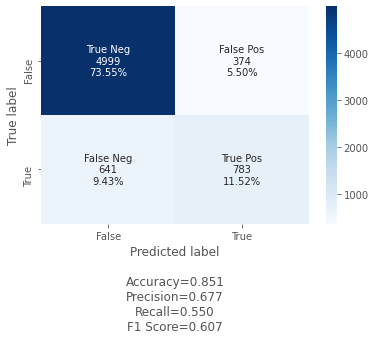

In [ ]:
cf_matrix_randfor2 = confusion_matrix(y_test, test_pred_randfor2)
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["False", "True"]
make_confusion_matrix(cf_matrix_randfor2 , 
                      group_names=labels,
                      categories=categories, 
                      cmap="Blues")

Confusion Matrix untuk SVM hasil tuning

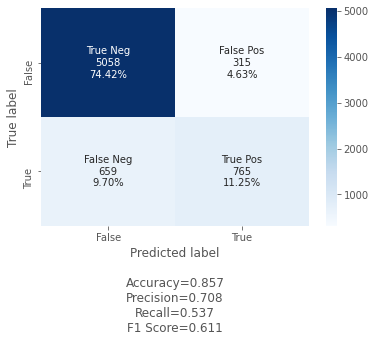

In [ ]:
cf_matrix_svm2 = confusion_matrix(y_test, test_pred_svm2)
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["False", "True"]
make_confusion_matrix(cf_matrix_svm2 , 
                      group_names=labels,
                      categories=categories, 
                      cmap="Blues")

Confusion Matrix untuk AdaBoost hasil tuning

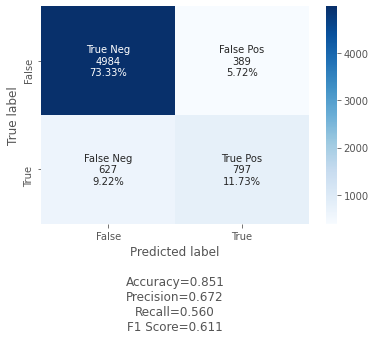

In [ ]:
cf_matrix_ada2 = confusion_matrix(y_test, test_pred_ada2)
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["False", "True"]
make_confusion_matrix(cf_matrix_ada2 , 
                      group_names=labels,
                      categories=categories, 
                      cmap="Blues")

Confusion Matrix untuk Gradient Boosting hasil tuning

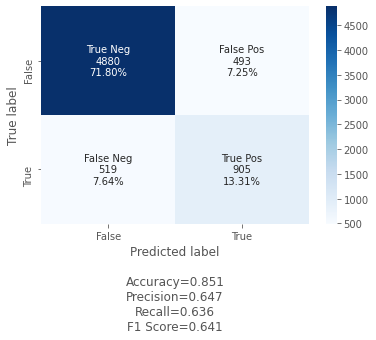

In [ ]:
cf_matrix_gb2 = confusion_matrix(y_test, test_pred_gb2)
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["False", "True"]
make_confusion_matrix(cf_matrix_gb2 , 
                      group_names=labels,
                      categories=categories, 
                      cmap="Blues")

#Eksperimen

**K-Nearest Neighbors (KNN)**

Eksperimen 1

In [ ]:
#Eksperimen KNN dengan pengubahan nilai parameter leaf_size = 3, n_neighbors=11 dan p=2
knnE1 = KNeighborsClassifier(leaf_size=3, n_neighbors=11, p=2, weights="uniform")
test_acc_knnE1, recall_knnE1, model_knnE1, train_pred_knnE1, test_pred_knnE1 = train_model(knnE1, x_train, x_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 0.8563654832156332
F1 Score: 0.565640313025671
Precision Score: 0.7443695861405197
Recall Score: 0.45612172682236374

==== Test Performance ====
Accuracy Score: 0.8258055024275416
F1 Score: 0.5
Precision Score: 0.6271186440677966
Recall Score: 0.4157303370786517

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      5373
           1       0.63      0.42      0.50      1424

    accuracy                           0.83      6797
   macro avg       0.74      0.68      0.70      6797
weighted avg       0.81      0.83      0.81      6797



Berdasarkan klasifikasi menggunakan KNN, didapatkan hasil akurasi sebesar 85.6% dan 82.5% untuk data train dan data test.

Eksperimen 2

In [ ]:
#Eksperimen KNN dengan pengubahan nilai parameter  n_neighbors=30
knnE2 = KNeighborsClassifier(leaf_size=1, n_neighbors=30, p=1, weights="uniform")
test_acc_knnE2, recall_knnE2, model_knnE2, train_pred_knnE2, test_pred_knnE2 = train_model(knn2, x_train, x_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 0.8647334816677953
F1 Score: 0.5960857947569871
Precision Score: 0.7686720059601415
Recall Score: 0.4867893371078085

==== Test Performance ====
Accuracy Score: 0.8343386788288951
F1 Score: 0.5296574770258982
Precision Score: 0.6536082474226804
Recall Score: 0.4452247191011236

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5373
           1       0.65      0.45      0.53      1424

    accuracy                           0.83      6797
   macro avg       0.76      0.69      0.71      6797
weighted avg       0.82      0.83      0.82      6797



Berdasarkan klasifikasi menggunakan KNN, didapatkan hasil akurasi sebesar 84.6% dan 83.7% untuk data train dan data test.

---

**Decision Tree**

Eksperimen 1

In [ ]:
#Eksperimen Decision Tree dengan pengubahan nilai min_samples_leaf = 15, min_samples_split=3 dan random_state=134
dstE1 = DecisionTreeClassifier(max_features="auto", min_samples_leaf=15, min_samples_split=3, random_state=123)
dstE1_acc, dstE1_recall, model_dstE1, train_pred_dstE1, test_pred_dstE1 = train_model(dstE1, x_train, x_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 0.8785189126439006
F1 Score: 0.6652449183605466
Precision Score: 0.7646698330013789
Recall Score: 0.5887001651332862

==== Test Performance ====
Accuracy Score: 0.826246873620715
F1 Score: 0.5741074648395239
Precision Score: 0.5900667160859896
Recall Score: 0.5589887640449438

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      5373
           1       0.59      0.56      0.57      1424

    accuracy                           0.83      6797
   macro avg       0.74      0.73      0.73      6797
weighted avg       0.82      0.83      0.82      6797



Berdasarkan klasifikasi menggunakan Decision Tree, didapatkan hasil akurasi sebesar 87.8% dan 82.6% untuk data train dan data test.

Eksperimen 2

In [ ]:
#Eksperimen Decision Tree dengan penambahan parameter max_depth= 5
dstE2 = DecisionTreeClassifier(max_features="auto", min_samples_leaf=11, min_samples_split=2, random_state=123, max_depth=5)
dstE2_acc, dstE2_recall, model_dstE2, train_pred_dstE2, test_pred_dstE2 = train_model(dstE2, x_train, x_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 0.8417335784076618
F1 Score: 0.5072289156626505
Precision Score: 0.7013744273219492
Recall Score: 0.39726350554376033

==== Test Performance ====
Accuracy Score: 0.8309548330145653
F1 Score: 0.5427775567051334
Precision Score: 0.6262626262626263
Recall Score: 0.4789325842696629

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      5373
           1       0.63      0.48      0.54      1424

    accuracy                           0.83      6797
   macro avg       0.75      0.70      0.72      6797
weighted avg       0.82      0.83      0.82      6797



Berdasarkan klasifikasi menggunakan Decision Tree, didapatkan hasil akurasi sebesar 84.1% dan 83.09% untuk data train dan data test.

---

**Random Forest**

Eksperimen 1

In [ ]:
#Eksperimen dengan pengubahan nilai parameter min_samples_leaf = 3 dan min_samples_split=15, n_estimators= 40
randforE1 = RandomForestClassifier(criterion="entropy", min_samples_leaf=3, min_samples_split=15, n_estimators=40, n_jobs=-1, random_state=123)
randforE1_acc, randforE1_recall, model_randforE1, train_pred_randforE1, test_pred_randforE1 = train_model(randforE1, x_train, x_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 0.9362484279771693
F1 Score: 0.8244305315039296
Precision Score: 0.9469094247246022
Recall Score: 0.7300070771408351

==== Test Performance ====
Accuracy Score: 0.8555244961012212
F1 Score: 0.6211419753086419
Precision Score: 0.6892123287671232
Recall Score: 0.5653089887640449

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5373
           1       0.69      0.57      0.62      1424

    accuracy                           0.86      6797
   macro avg       0.79      0.75      0.77      6797
weighted avg       0.85      0.86      0.85      6797



Berdasarkan klasifikasi menggunakan Random Forest, didapatkan hasil akurasi sebesar 93.1% dan 85.5% untuk data train dan data test.

Eksperimen 2

In [ ]:
#Eksperimen dengan pengubahan nilai parameter n_estimators= 60
randforE2 = RandomForestClassifier(criterion="entropy", min_samples_leaf=1, min_samples_split=7, n_estimators=60, n_jobs=-1, random_state=123)
randforE2_acc, randforE2_recall, model_randforE2, train_pred_randforE2, test_pred_randforE2 = train_model(randforE2, x_train, x_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 0.9857308696913998
F1 Score: 0.9641380987114029
Precision Score: 0.9946074742914472
Recall Score: 0.9354800660533145

==== Test Performance ====
Accuracy Score: 0.854053258790643
F1 Score: 0.6228136882129278
Precision Score: 0.6791044776119403
Recall Score: 0.5751404494382022

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5373
           1       0.68      0.58      0.62      1424

    accuracy                           0.85      6797
   macro avg       0.79      0.75      0.77      6797
weighted avg       0.85      0.85      0.85      6797



Berdasarkan klasifikasi menggunakan Random Forest, didapatkan hasil akurasi sebesar 98.5% dan 85.4% untuk data train dan data test.

---

**Support Vector Machine (SVM)**

Eksperimen 1

In [ ]:
#Eksperimen SVM dengan penggunaan parameter C=1 dan gamma = 0.001
svmE1 = SVC(C=1, gamma=0.001)
svmE1_acc, svmE1_recall, model_svmE1, train_pred_svmE1, test_pred_svmE1 = train_model(svmE1, x_train, x_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 0.809809422462997
F1 Score: 0.21516966067864274
Precision Score: 0.6990920881971465
Recall Score: 0.12715263033734372

==== Test Performance ====
Accuracy Score: 0.8040311902309842
F1 Score: 0.20714285714285716
Precision Score: 0.6796875
Recall Score: 0.12219101123595505

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      5373
           1       0.68      0.12      0.21      1424

    accuracy                           0.80      6797
   macro avg       0.74      0.55      0.55      6797
weighted avg       0.78      0.80      0.75      6797



Berdasarkan klasifikasi menggunakan Random Forest, didapatkan hasil akurasi sebesar 80.9% dan 80.4% untuk data train dan data test.

Eksperimen 2

In [ ]:
#Eksperimen SVM dengan penggunaan parameter C=0.1 dan gamma = 1
svmE2 = SVC(C=0.1, gamma=1)
svmE2_acc, svmE2_recall, model_svmE2, train_pred_svmE2, test_pred_svmE2 = train_model(svmE2, x_train, x_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 0.8152752249201896
F1 Score: 0.20254750469826688
Precision Score: 0.8818181818181818
Recall Score: 0.114413776834159

==== Test Performance ====
Accuracy Score: 0.8085920258937767
F1 Score: 0.20135052179251076
Precision Score: 0.8
Recall Score: 0.1151685393258427

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      5373
           1       0.80      0.12      0.20      1424

    accuracy                           0.81      6797
   macro avg       0.80      0.55      0.55      6797
weighted avg       0.81      0.81      0.75      6797



Berdasarkan klasifikasi menggunakan SVM, didapatkan hasil akurasi sebesar 81.5% dan 80.8% untuk data train dan data test.

---

**AdaBoost**

Eksperimen 1

In [ ]:
#Eksperimen AdaBoost dengan pengubahan nilai parameter n_estimators = 400 dan learning_rate=1
abcE1 = AdaBoostClassifier(n_estimators=400, learning_rate=1)
adaE1_acc, adaE1_recall, model_adaE1, train_pred_adaE1, test_pred_adaE1 = train_model(abcE1, x_train, x_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 0.8629921640708136
F1 Score: 0.6071700991609458
Precision Score: 0.7366649840148073
Recall Score: 0.5163953762679877

==== Test Performance ====
Accuracy Score: 0.8418419891128439
F1 Score: 0.6309646412633023
Precision Score: 0.6171927468099395
Recall Score: 0.6453651685393258

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      5373
           1       0.62      0.65      0.63      1424

    accuracy                           0.84      6797
   macro avg       0.76      0.77      0.77      6797
weighted avg       0.84      0.84      0.84      6797



Berdasarkan klasifikasi menggunakan AdaBoost, didapatkan hasil akurasi sebesar 86.2% dan 84.1% untuk data train dan data test.

Eksperimen 2

In [ ]:
#Eksperimen AdaBoost dengan pengubahan nilai parameter n_estimators = 600
abcE2 = AdaBoostClassifier(n_estimators=600, learning_rate=0.1)
adaE2_acc, adaE2_recall, model_adaE2, train_pred_adaE2, test_pred_adaE2 = train_model(abcE2, x_train, x_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 0.8595820837767244
F1 Score: 0.5875834635601648
Precision Score: 0.7385714285714285
Recall Score: 0.48785090823307387

==== Test Performance ====
Accuracy Score: 0.8475798146240988
F1 Score: 0.6134328358208956
Precision Score: 0.6544585987261147
Recall Score: 0.577247191011236

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      5373
           1       0.65      0.58      0.61      1424

    accuracy                           0.85      6797
   macro avg       0.77      0.75      0.76      6797
weighted avg       0.84      0.85      0.84      6797



Berdasarkan klasifikasi menggunakan AdaBoost, didapatkan hasil akurasi sebesar 85.9% dan 84.7% untuk data train dan data test.

---

**Gradient Boosting**

Eksperimen 1

In [ ]:
#Eksperimen dengan pengubahan nilai parameter n_estimators=100, max_depth=3 dan learning_rate=0.5
gbE1 = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.5)
gbE1_acc, gbE1_recall, model_gbE1, train_pred_gbE1, test_pred_gbE1= train_model(gbE1, x_train, x_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 0.8813243687723711
F1 Score: 0.6625404029984182
Precision Score: 0.7944911759854857
Recall Score: 0.5681764567114885

==== Test Performance ====
Accuracy Score: 0.8477269383551567
F1 Score: 0.6341463414634146
Precision Score: 0.6384341637010676
Recall Score: 0.6299157303370787

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      5373
           1       0.64      0.63      0.63      1424

    accuracy                           0.85      6797
   macro avg       0.77      0.77      0.77      6797
weighted avg       0.85      0.85      0.85      6797



Berdasarkan klasifikasi menggunakan GradientBoosting, didapatkan hasil akurasi sebesar 88.1% dan 84.8% untuk data train dan data test.

Eksperimen 2

In [ ]:
#Eksperimen dengan pengubahan nilai parameter n_estimators=100
gbE2 = GradientBoostingClassifier(n_estimators=100, max_depth=2, learning_rate=0.05)
gbE2_acc, gbE2_recall, model_gbE2, train_pred_gbE2, test_pred_gbE2= train_model(gbE2, x_train, x_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 0.8568975524813776
F1 Score: 0.5625785466104828
Precision Score: 0.7536145771439889
Recall Score: 0.44880868129275775

==== Test Performance ====
Accuracy Score: 0.853170516404296
F1 Score: 0.5969305331179322
Precision Score: 0.7024714828897338
Recall Score: 0.5189606741573034

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5373
           1       0.70      0.52      0.60      1424

    accuracy                           0.85      6797
   macro avg       0.79      0.73      0.75      6797
weighted avg       0.84      0.85      0.84      6797



Berdasarkan klasifikasi menggunakan GradientBoosting, didapatkan hasil akurasi sebesar 85.6% dan 85.3% untuk data train dan data test.

# Convert Data Hasil Prediksi Terbaik ke CSV
Hasil prediksi terbaik diperoleh dari model Gradient Boosting yang telah dilakukan hyperparameter tuning.

In [ ]:
test_pred_gb2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#reset index
df_test = df_test.reset_index()

In [ ]:
#Menambahkan kolom PrediksiBersaljuBesok 
df_test["PrediksiBersaljuBesok"] = test_pred_gb2
df_test

,index,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok,PrediksiBersaljuBesok
0,2,0.405248,27.2,0.0,0.086957,0.717241,0.211538,0.200000,0.292308,0.887755,0.255102,0.611807,0.570588,0.000,0.125,0.358491,0.520581,0,0,0
1,3,0.653061,27.0,0.0,0.076923,0.462069,0.230769,0.307692,0.230769,0.540816,0.397959,0.461538,0.431373,0.875,0.750,0.584906,0.523002,0,0,0
2,7,0.556851,22.4,0.0,0.073579,0.268966,0.163462,0.138462,0.169231,0.561224,0.500000,0.683363,0.668627,0.875,0.875,0.477089,0.389831,0,0,0
3,8,0.728863,33.7,0.0,0.197324,0.765517,0.394231,0.307692,0.369231,0.530612,0.316327,0.416816,0.372549,0.625,0.625,0.646900,0.663438,0,0,0
4,10,0.373178,18.2,0.0,0.026756,0.351724,0.192308,0.169231,0.230769,0.938776,0.469388,0.763864,0.743137,0.875,0.875,0.261456,0.312349,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6792,18170,0.527697,24.9,0.0,0.103679,0.668966,0.192308,0.200000,0.200000,0.581633,0.500000,0.711986,0.694118,0.875,0.875,0.603774,0.457627,0,0,0
6793,18174,0.562682,27.8,0.0,0.110368,0.696552,0.230769,0.200000,0.369231,0.591837,0.551020,0.669052,0.627451,0.375,0.250,0.598383,0.496368,0,0,0
6794,18177,0.364431,25.8,0.0,0.133779,0.910345,0.192308,0.338462,0.200000,0.581633,0.193878,0.584973,0.541176,0.750,0.125,0.436658,0.464891,0,0,0
6795,18178,0.498542,26.6,0.0,0.133779,0.800000,0.250000,0.261538,0.307692,0.581633,0.234694,0.676208,0.629412,0.125,0.125,0.444744,0.506053,0,0,0


In [ ]:
#Mengubah nilai 0 dan 1 pada kolom BersaljuHariIni, BerlsajuBesok dan PrediksiBerlsajuBesok menjasi Tidak dan Ya
df_test = df_test.replace({0: "Tidak", 1: "Ya"})

In [ ]:
df_test.head(10)

,index,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok,PrediksiBersaljuBesok
0,2,0.405248,27.2,Tidak,0.0869565,0.717241,0.211538,0.2,0.292308,0.887755,0.255102,0.611807,0.570588,Tidak,0.125,0.358491,0.520581,Tidak,Tidak,Tidak
1,3,0.653061,27.0,Tidak,0.0769231,0.462069,0.230769,0.307692,0.230769,0.540816,0.397959,0.461538,0.431373,0.875,0.75,0.584906,0.523002,Tidak,Tidak,Tidak
2,7,0.556851,22.4,Tidak,0.0735786,0.268966,0.163462,0.138462,0.169231,0.561224,0.5,0.683363,0.668627,0.875,0.875,0.477089,0.389831,Tidak,Tidak,Tidak
3,8,0.728863,33.7,Tidak,0.197324,0.765517,0.394231,0.307692,0.369231,0.530612,0.316327,0.416816,0.372549,0.625,0.625,0.6469,0.663438,Tidak,Tidak,Tidak
4,10,0.373178,18.2,Tidak,0.0267559,0.351724,0.192308,0.169231,0.230769,0.938776,0.469388,0.763864,0.743137,0.875,0.875,0.261456,0.312349,Tidak,Tidak,Tidak
5,11,0.830904,30.6,0.6,0.103679,0.37931,0.394231,0.338462,0.307692,0.755102,0.663265,0.491950,0.421569,Ya,Ya,0.698113,0.573850,Tidak,Ya,Ya
6,14,0.370262,20.3,Tidak,0.0869565,0.827586,0.182692,0.107692,0.261538,0.785714,0.622449,0.629696,0.635294,0.875,0.375,0.382749,0.334140,Tidak,Tidak,Tidak
7,17,0.673469,27.9,Tidak,0.22408,0.737931,0.413462,0.430769,0.338462,0.265306,0.0816327,0.416816,0.366667,Tidak,Tidak,0.563342,0.552058,Tidak,Tidak,Tidak
8,18,0.483965,32.8,Tidak,0.0769231,0.868966,0.182692,0.138462,0.307692,0.785714,0.326531,0.626118,0.574510,0.75,0.875,0.509434,0.646489,Tidak,Tidak,Tidak
9,22,0.548105,22.9,2.2,0.0568562,0.57931,0.413462,0.261538,0.369231,0.744898,0.581633,0.479428,0.441176,0.625,0.375,0.442049,0.372881,Ya,Tidak,Ya


In [ ]:
#Convert data ke csv
df_test.to_csv('01_salju.csv', index=False, header=True)

# Kesimpulan
---
Berdasarkan hasil klasifikasi dengan menggunakan model KNN, Decision Tree, Random Forest, SVM, AdaBoost dan Gradient Boosting dapat disimpulkan bahwa hasil klasifikasi terbaik dilakukan oleh model Gradient Boosting dengan akurasi data test 0,851, F1 score 0,641, precision score 0,647 dan recall 0,635. Hasil tersebut diperoleh setelah melakukan hyperparameter tuning dan semua fitur digunakan dalam pemodelan ini untuk mendapatkan akurasi yang terbaik.